<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# IPL Matches Data Analysis 
Term -1 (Swathi Jami, Anitha C)

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Number of matches held season wise](#section401)<br/>
    - 4.2 [Number of matches won by each team at each season ](#section402)<br/>
    - 4.3 [Total matches played by each team](#section403)<br/>
    - 4.4 [How many matches won by each team ?](#section404)<br/>
    - 4.5 [Comparison between Number of matches won by each team and total matches played](#section405)<br/>
    - 4.6 [Success Rate of each team?](#section406)<br/>
    - 4.7 [Each Season Winner](#section407)<br/>
    - 4.8 [Which team won maximum seasons ?](#section408)<br/>
    - 4.9 [Teams won by maximum runs](#section409)<br/>
    - 4.10 [Team won by marginal runs](#section410)<br/>
    - 4.11 [Best Defending Teams](#section411)<br/>
    - 4.12[Team won by maximum wickets](#section412)<br/>
    - 4.13 [Team won by minimum wickets](#section413)<br/>
    - 4.14 [Best Chasing Teams](#section414)<br/>
    - 4.15 [Top 10 high performing Players](#section415)<br/>
    - 4.16 [Toss winning success rate of each team](#section416)<br/>
    - 4.17 [Toss Decision across matches](#section417)<br/>
    - 4.18 [Toss Decision across seasons](#section418)<br/>
    - 4.19 [How does Toss decision varied Season wise by each team ?](#section419)<br/>
    - 4.20 [How toss winning affects the match winner](#section420)<br/>
    - 4.21 [Toss Decision  in which Toss winner is the game winner](#section421)<br/>
    - 4.22 [Top 10 Cities to hold match](#section422)<br/>
    - 4.23 [ In which city does each team has won more matches ?](#section423)<br/>
    - 4.24 [Top 10 Venues to hold match](#section424)<br/>
    - 4.25 [Identify if each Venue is Best Suited to opt for batting or fielding based on previous matches won on that venue?](#section425)<br/>
    - 4.26 [Match Results : Normal , tie and no result](#section426)<br/>
    - 4.27 [Cities with maximum DL Applied](#section427)<br/>
    - 4.28 [Hypothesis: ](#section428)<br/>
5. [Conclusions](#section5)<br/>  


### 1. Problem Statement  <a class="anchor" id="section1">

In this python notebook, analysis of IPL matches from 2008 to 2018 is done using python packages like pandas, matplotlib and seaborn. This Exploratory Data Analysis will help us to find patterns in data, determining relationships in data. We will try to identify the team that has more chance to win the upcoming seasons by finding observations like success rate of each team, identify the team that has won maximum seasons, best defending and chasing team and analyse the toss decisions etc.

<a id=section2></a>

### 2. Data Loading and Description <a class="anchor" id="section2">


<a id=section201></a>

- The dataset consists of the information about IPL matches held from 2008 to 2018. 
- The dataset comprises of __696 observations of 18 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| ID   | Match ID                                        | 
| Season      | IPL Season Year                        |  
| City        | City in which match held                                           | 
| Date          | Date on which match Held                                        |   
| Team1           | Team1                                        |
| Team2           | Team 2                                         |
| Toss_winner         | Team who won the toss |
| Toss_decision         | opted to field or bat|
| Result        |  normal or tie or Dl applied                                     |
| Winner        | Team who won the match                                            |
| Win by Runs          | Team won by how many runs                                           |
| Win by Wickets         | Team won by how many wickets                                              |
| Player Of match        | Player who won man of the match                                          |
| Venue          | Stadium where the match held                                           |
| Umpire1         | Umpire1 name                                              |
| Umpire2          | Umpire2 name                                           |
| Umpire3         | Umpire3 name                                              |

#### Some Background Information
The Indian Premier League (IPL), is a professional Twenty20 cricket league in India contested during April and May of every year
by teams representing Indian cities and some states from 2008 to 2018. The dataset that we use in this notebook is matches.csv

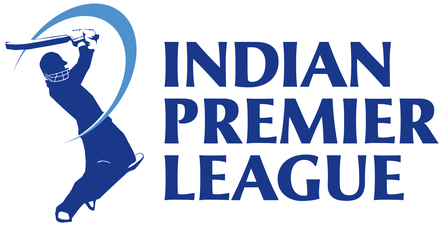

#### Importing packages                                          

In [48]:
import numpy as np                  # Implemennts milti-dimensional array and matrices
import pandas as pd                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 


def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

#### Importing the Dataset

In [49]:
matches_data = pd.read_csv('https://github.com/insaid2018/Term-1/raw/master/Data/Projects/matches.csv')
matches_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id=section3></a>

## 3. Data Profiling

- __understanding our dataset__ using various pandas functionalities.
- __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

Observing few rows and columns of data both from the starting and from the end


In [50]:
matches_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(696, 18)

IPL matches data has __696 rows__ and __18 columns.__

In [51]:
matches_data.columns                                            # This will print the names of all columns.

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [52]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id=section301></a>

In [53]:
matches_data.tail()                                                   # This will print the last n rows of the Data Frame

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [54]:
matches_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [55]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [56]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above output we can see that __city__ and __umpire3__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [57]:
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(outputfile="matchesdata_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __matches_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of __City__ from the Venue Column.
    - Replacing __Rising Pune supergiant as Rising Pune supergiants __.
    - Dropping the column __'Umpire3'__ as it has too many _null_ values.
    - Replace city __Bengaluru to Bangalore__

Drop umpire3 column as it has 91% missing values

In [58]:
matches_data.drop('umpire3', axis=1, inplace=True)  
matches_data.columns.unique()

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

Rising Pune Supergiants is having 2 teams with different names (Rising Pune Supergiants and Rising Pune Supergiant)  replacing all values with same name Rising Pune Supergiants

In [59]:
#Replacing Rising Pune Supergiant with Rising Pune Supergiants
matches_data.replace( 'Rising Pune Supergiant', 'Rising Pune Supergiants',inplace = True)
matches_data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


### Replacing Null values in CITY column from VENUE

In [60]:
matches_data['city'].fillna( matches_data['venue'].apply(lambda x: x[:5]),inplace = True)
matches_data[matches_data['city']== 'Dubai']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,Dubai,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,Dubai,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,Dubai,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,Dubai,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


### Missing values of winner and player_of_match columns.

In [61]:
matches_data[matches_data['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


As the matches had no result these columns would be left blank and no need to replace with any values.

### Replace city Bengaluru to Bangalore

In [62]:
matches_data.replace( 'Bengaluru', 'Bangalore',inplace = True)
matches_data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

### 3.4 Post Profiling<a class="anchor" id="section304">

In [63]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(outputfile="matchesdata_after_preprocessing.html")

In [64]:

matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [65]:
# display the seasons
matches_data['season'].unique()  

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018],
      dtype=int64)

In [66]:
# display the team names in IPL
matches_data['team1'].unique() 

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

### 4. Questions <a class="anchor" id="section4">

 ### 4.1 Number of matches held season wise  <a class="anchor" id="section401">

Text(0,0.5,'No. of Matches')

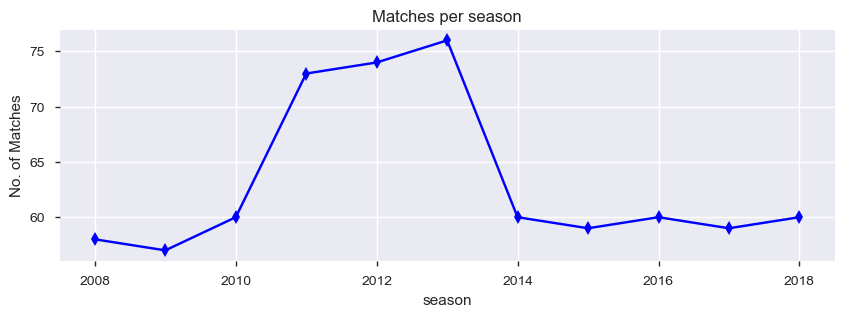

In [67]:
#No. of matches held each season

fig = plt.figure()
ax = fig.add_subplot(111)
ax=matches_data.groupby("season")["id"].count().plot(kind="line",title="Matches per season", marker='d',color=['blue'],figsize=(10,3)) 
plt.ylabel("No. of Matches")




Observation : More number of matches was held in __ Season 2013__ : 76 Matches

### 4.2 Number of matches won by each team at each season <a class="anchor" id="section402">

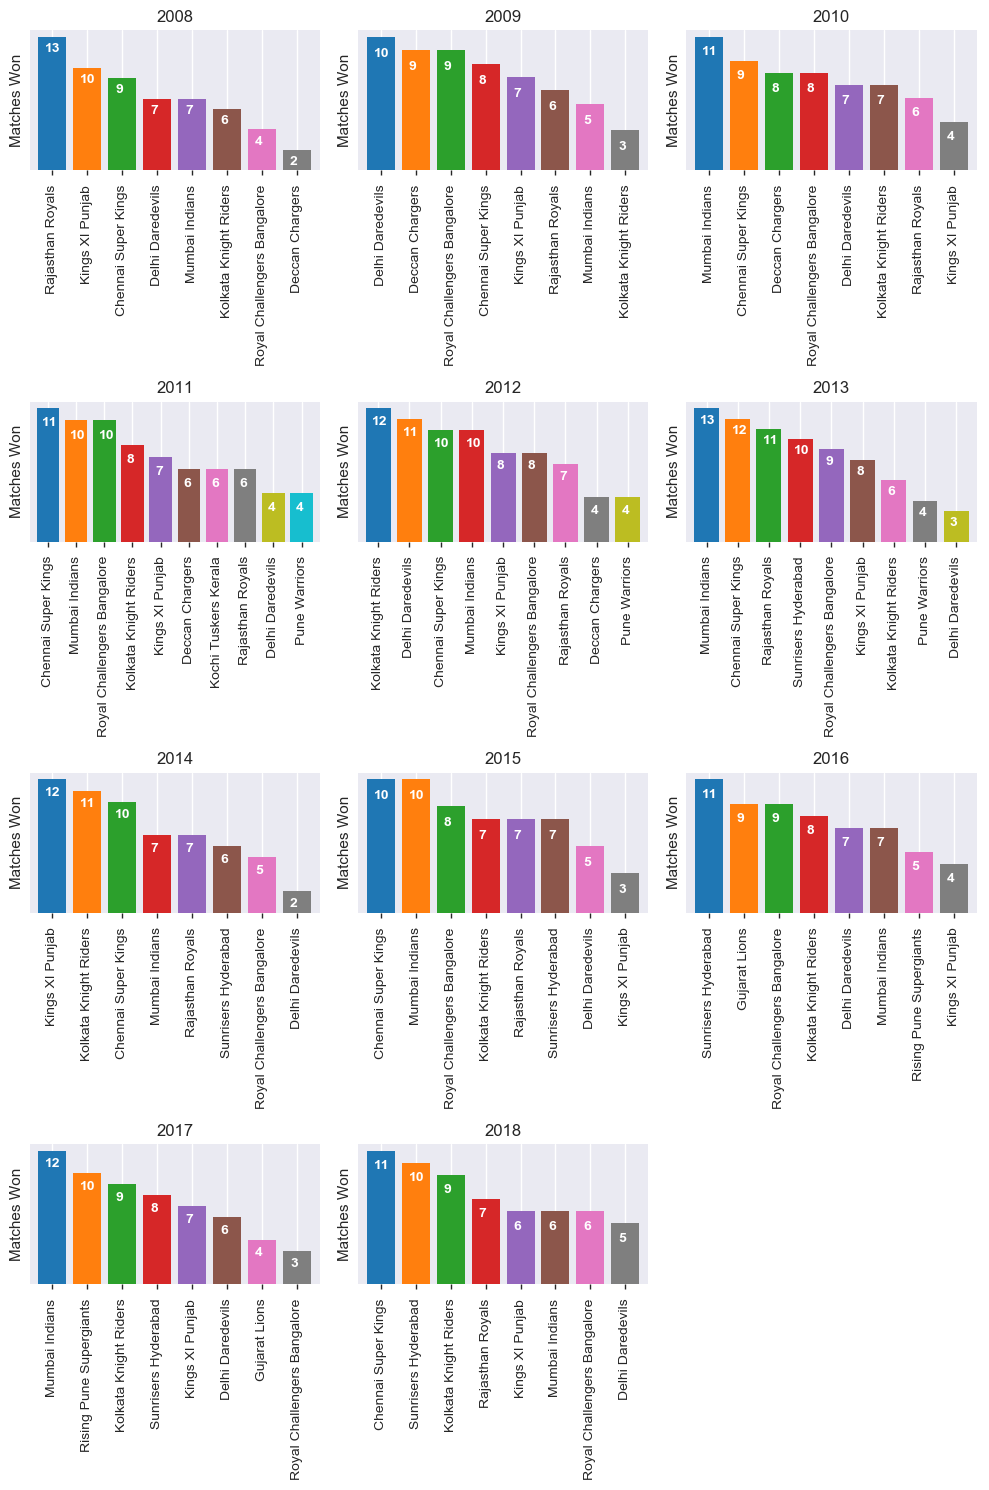

In [68]:
max_times_winner = matches_data.groupby('season')['winner'].value_counts()

count=1
fig = plt.figure()

groups=max_times_winner.groupby('season')
for year,group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax=group[year].plot(kind="bar",figsize=(10,15),width=0.8)
    count=count+1
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="white",fontweight='bold')
    
    
plt.tight_layout()
plt.show()



Observation : __Mumbai Indians__ and __Chennai super kings__ has won maximum matches 

### 4.3 Total matches played by each team  <a class="anchor" id="section403">

In [69]:
matches_played = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
matches_played


Chennai Super Kings            147
Deccan Chargers                 75
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                162
Kochi Tuskers Kerala            14
Kolkata Knight Riders          164
Mumbai Indians                 171
Pune Warriors                   46
Rajasthan Royals               133
Rising Pune Supergiants         30
Royal Challengers Bangalore    166
Sunrisers Hyderabad             93
dtype: int64

### 4.4 How many matches won by each team ?  <a class="anchor" id="section404">

In [70]:
matches_won = matches_data.groupby('winner').count()
matches_won["id"]

winner
Chennai Super Kings            90
Deccan Chargers                29
Delhi Daredevils               67
Gujarat Lions                  13
Kings XI Punjab                76
Kochi Tuskers Kerala            6
Kolkata Knight Riders          86
Mumbai Indians                 98
Pune Warriors                  12
Rajasthan Royals               70
Rising Pune Supergiants        15
Royal Challengers Bangalore    79
Sunrisers Hyderabad            52
Name: id, dtype: int64

### 4.5 Comparison between Number of matches won by each team and total matches played <a class="anchor" id="section405">

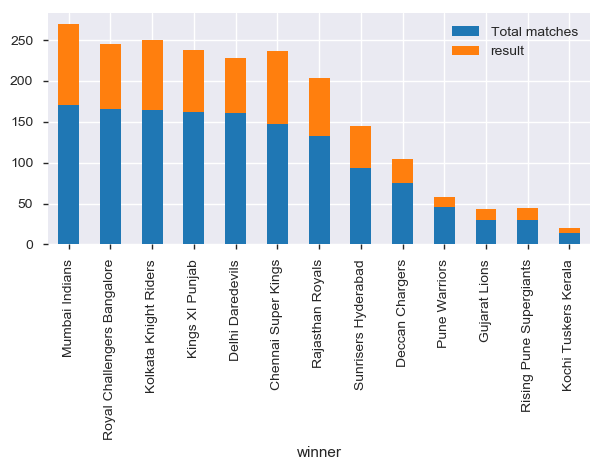

In [71]:
matches_won = matches_data.groupby('winner').count()
matches_won

total_matches = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
total_matches

matches_won['Total matches']=total_matches
matches_won[["Total matches","result"]].sort_values(by=["Total matches"],ascending=False).plot.bar(stacked=True,figsize=(7,3))

Observation: __Mumbai Indians, Chennai Super Kings__ has more wins against total number of matches played by each team and __Pune Warriors__ has least wins against total matches played by them.

### 4.6 Success Rate of each team <a class="anchor" id="section406">

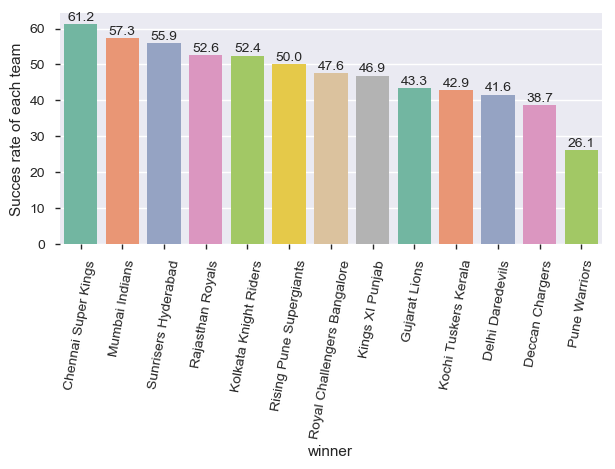

In [72]:
match_succes_rate = (matches_won["id"]/total_matches)*100
#print(match_succes_rate)

data = match_succes_rate.sort_values(ascending = False)
plt.figure(figsize=(7,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Succes rate of each team')
plt.xticks(rotation=80)
annot_plot(ax,0.08,1)


Observation :__Chennai Super Kings__ have highest winning success rate __(61.2%)__ , followed by Mumbai Indians __(57.3%)__.

### 4.7. Each Season Winner <a class="anchor" id="section407">

In [73]:
season_winner = matches_data.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by="season",ascending=True)

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


The above table displays each season wise winner from 2008 to 2018

### 4.8 Which team won maximum seasons ?  <a class="anchor" id="section408">

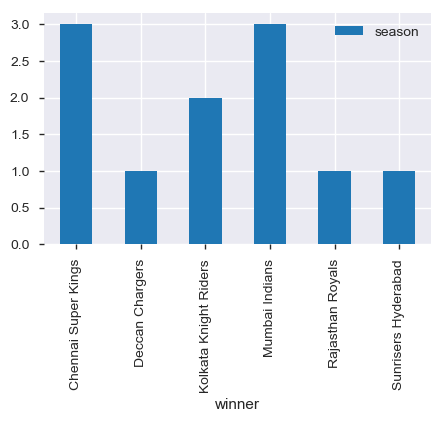

In [74]:
season_winner.groupby('winner').count().plot.bar(figsize=(5,3))

Observation: __Chennai Super Kings and Mumbai Indians__ won 3 seasons each

### 4.9 Teams won by maximum runs   <a class="anchor" id="section409">

In [75]:
maximum_runs = matches_data.sort_values('win_by_runs', ascending = False)[:5].head(5)
maximum_runs[['season','winner','win_by_runs']]

,season,winner,win_by_runs
43,2017,Mumbai Indians,146
619,2016,Royal Challengers Bangalore,144
59,2008,Kolkata Knight Riders,140
556,2015,Royal Challengers Bangalore,138
410,2013,Royal Challengers Bangalore,130


Observation: __Royal Challengers Bangalore__ has won by maximum runs most of the time, they are good defenders and __Mumbai Indians__ has won with highest run difference of __146__.

### 4.10 Team won by marginal runs <a class="anchor" id="section410">

In [76]:
min_runs = matches_data[matches_data['win_by_runs'] == 1]
min_runs['winner'].value_counts()

Kings XI Punjab                2
Mumbai Indians                 2
Delhi Daredevils               1
Royal Challengers Bangalore    1
Gujarat Lions                  1
Chennai Super Kings            1
Name: winner, dtype: int64

 __Mumbai Indians__ and __Kings XI Punjab__ defended the opposite team with marginal runs.

### 4.11 Best Defending Teams <a class="anchor" id="section411">

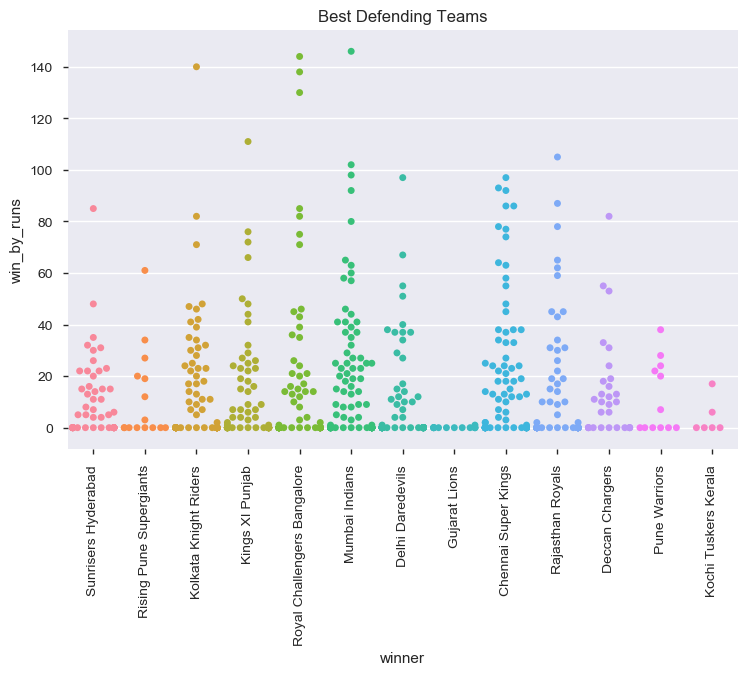

In [77]:
plt.figure(figsize=(8,5))

sns.swarmplot(y='win_by_runs',x='winner',data=matches_data)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Best Defending Teams')
plt.show()

__Mumbai Indians, Royal Challangers Bangalore, Chennai Super kings and Sunrisers Hyderabad__ are best Defending teams.

### 4.12 Team won by maximum wickets <a class="anchor" id="section412">

In [78]:
max_wickets=matches_data[matches_data['win_by_wickets']==10]
max_wickets['winner'].value_counts()

Royal Challengers Bangalore    3
Kolkata Knight Riders          1
Chennai Super Kings            1
Rajasthan Royals               1
Sunrisers Hyderabad            1
Delhi Daredevils               1
Mumbai Indians                 1
Kings XI Punjab                1
Deccan Chargers                1
Name: winner, dtype: int64

Observation : __Royal Challengers Bangalore__ is a best chasing team, had won the match many times with maximum wickets.

### 4.13 Team won by minimum wickets <a class="anchor" id="section413">

In [79]:
matches_data[['season','winner','win_by_wickets']][matches_data['win_by_wickets'] ==1]

,season,winner,win_by_wickets
559,2015,Kolkata Knight Riders,1
636,2018,Chennai Super Kings,1
642,2018,Sunrisers Hyderabad,1


__Kolkata Knight Riders, Chennai Super Kings, Sunrisers Hyderabad__ had won the match with marginal wickets.

### 4.14 Best Chasing Team <a class="anchor" id="section414">

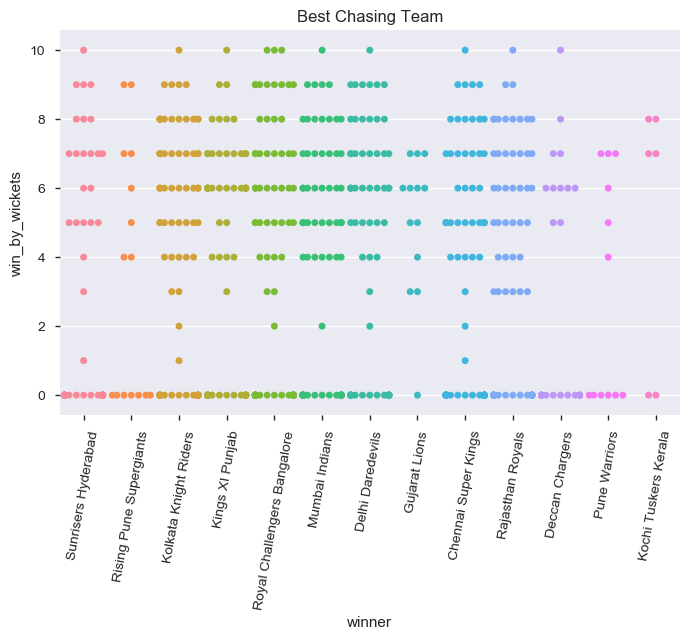

In [80]:
plt.figure(figsize=(8,5))
sns.swarmplot(y='win_by_wickets',x='winner',data=matches_data)
plt.xticks(rotation=80)
plt.title('Best Chasing Team')
plt.show()

__Royal Challangers Bangalore, Mumbai Indians__ and __Kolkata Knight Riders__ are the best Chasing teams.

<a id=section411></a>

### 4.15 Top 10 high performing Players <a class="anchor" id="section415">

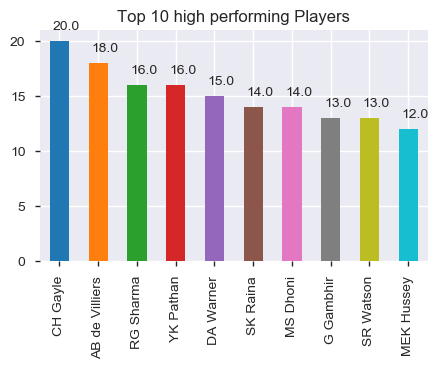

In [81]:
plt.figure(figsize=(5,3))

ax =matches_data['player_of_match'].value_counts()[:10].plot.bar()
plt.title('Top 10 high performing Players')
annot_plot(ax,0.08,1)

__CH Gayle__ has won Player of the match  __20__ times followed by __AB de Villers__ who had won __18__ times.

### 4.16  Toss winning success rate of each team <a class="anchor" id="section416">

Text(0.5,1,'Toss winning success rate of each team')

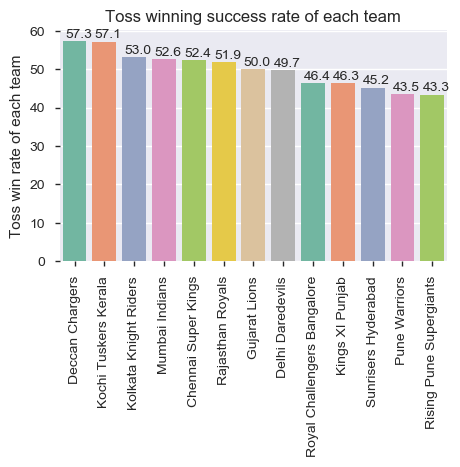

In [82]:
toss_won = matches_data['toss_winner'].value_counts()
toss_win_rate = (toss_won/matches_played)*100
data = toss_win_rate.sort_values(ascending = False)
plt.figure(figsize=(5,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Toss win rate of each team')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)
plt.title('Toss winning success rate of each team')

__Deccan Chargers__ has the highest Toss winning success rate of __57.3%__ and __Rising Pune Supergaints__ has the least toss winning success rate of __43.3%__.

### 4.17 Toss Decision across matches <a class="anchor" id="section417">

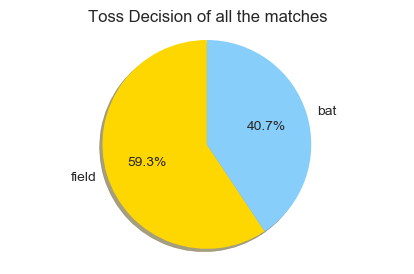

In [83]:
toss=matches_data['toss_decision'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']

# Plot
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Decision of all the matches')
plt.axis('equal')
plt.show()

__59.3%__ of the toss winning teams have opted for __Feilding__ while __40.7%__ have opted for __Batting__.

### 4.18 Toss Decision across seasons <a class="anchor" id="section418">

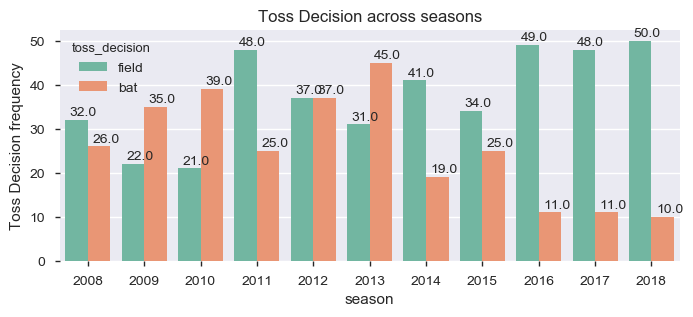

In [84]:
plt.figure(figsize=(8,3))
ax =sns.countplot(x='season',hue='toss_decision',data=matches_data,palette="Set2")
plt.ylabel('Toss Decision frequency')
plt.title('Toss Decision across seasons')
annot_plot(ax,0.08,1)

From the year __2014__ most of the teams are opting to __field__ after winning toss.

### 4.19 How does Toss decision varied Season wise by each team ? <a class="anchor" id="section419">

Text(0.5,1,'Toss decision by each team')

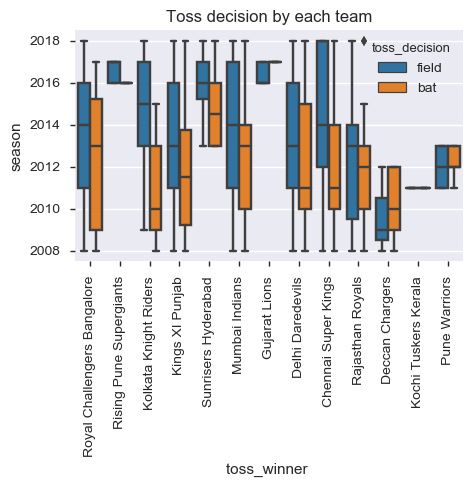

In [85]:
plt.figure(figsize=(5,3))
sns.boxplot(x="toss_winner", y="season", hue = 'toss_decision', data=matches_data)
plt.xlabel('toss_winner ')
plt.xticks(rotation=90)
plt.title('Toss decision by each team')

Almost all the teams are preferring to OPT for __feilding__ from __2014__ onwards.

### 4.20 How toss winning affects the match winner <a class="anchor" id="section420">

In [86]:
tosswin_win = matches_data['id'][matches_data['toss_winner'] == matches_data['winner']].count()
total_matches=matches_data['id'].count()
Success_rate = ((matches_data[matches_data['toss_winner'] == matches_data['winner']].count())/(total_matches))*100

print("Number of matches in which Toss winner is the game winner is :",tosswin_win, "out of",total_matches," ie.,", Success_rate["id"],"%" )


Number of matches in which Toss winner is the game winner is : 357 out of 696  ie., 51.293103448275865 %


###  4.21 Toss Decision  in which Toss winner is the game winner<a class="anchor" id="section421">

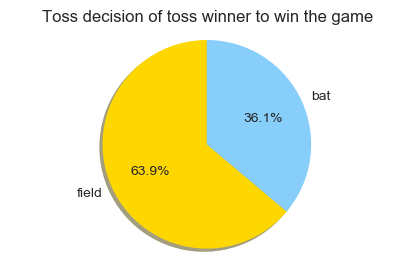

In [87]:
tosswin_winner = matches_data['toss_decision'][matches_data['toss_winner'] == matches_data['winner']].value_counts()
labels=np.array(tosswin_winner.index)
sizes = tosswin_winner.values
colors = ['gold', 'lightskyblue']

plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss decision of toss winner to win the game')
plt.axis('equal')
plt.show()

__63.9%__ of the toss winning teams had decided to __field__ first while __36.1%__ had decided to __Bat__ first and won the matches.

### 4.22 Top 10 Cities to hold match <a class="anchor" id="section422">

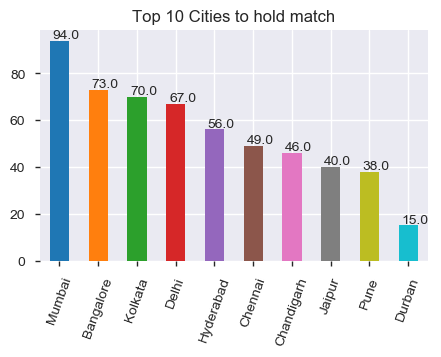

In [88]:
plt.figure(figsize=(5,3))

ax=matches_data['city'].value_counts()[:10].plot.bar()
plt.title('Top 10 Cities to hold match')
plt.xticks(rotation=70)
annot_plot(ax,0.08,1)

__Mumbai__ had hold highest number of matches (__94__) followed by __Kolkata (70)__.

### 4. 23 In which city does each team has won more matches ?<a class="anchor" id="section423">

In [89]:
a=matches_data.groupby(['winner','city']).size().reset_index(name='win_counts')
a=a.sort_values("win_counts",ascending=False)
a.groupby("winner").head(1)

,winner,city,win_counts
127,Mumbai Indians,Mumbai,48
109,Kolkata Knight Riders,Kolkata,42
4,Chennai Super Kings,Chennai,34
164,Royal Challengers Bangalore,Bangalore,34
149,Rajasthan Royals,Jaipur,29
43,Delhi Daredevils,Delhi,27
189,Sunrisers Hyderabad,Hyderabad,25
74,Kings XI Punjab,Chandigarh,22
161,Rising Pune Supergiants,Pune,5
137,Pune Warriors,Pune,4


Teams had won more matches in their home grounds.

### 4.24 Top 10 venue to hold matches <a class="anchor" id="section424">

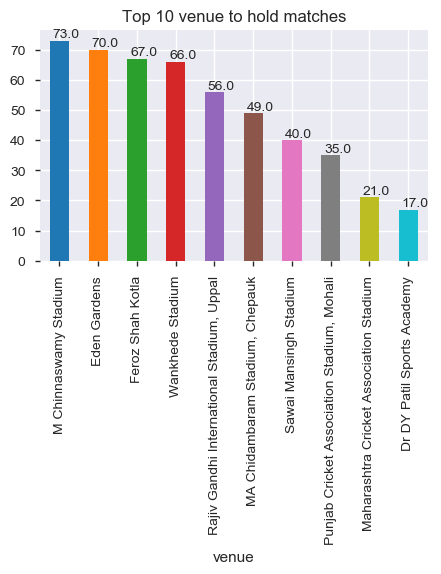

In [90]:
#top 10 venue to hold max number of matches
plt.figure(figsize=(5,3))
venue=matches_data.groupby('venue')["id"].count()
ax =venue.sort_values(ascending=False).head(10).plot.bar(figsize=(5,3))
plt.title('Top 10 venue to hold matches')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)

__M Chinnaswamy Stadium__ had hold highest number of matches (__73__) followed by __Eden Gardens (70)__.

### 4.25 Identify if each Venue is Best Suited to opt for batting or fielding based on previous matches won on that venue <a class="anchor" id="section425">

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

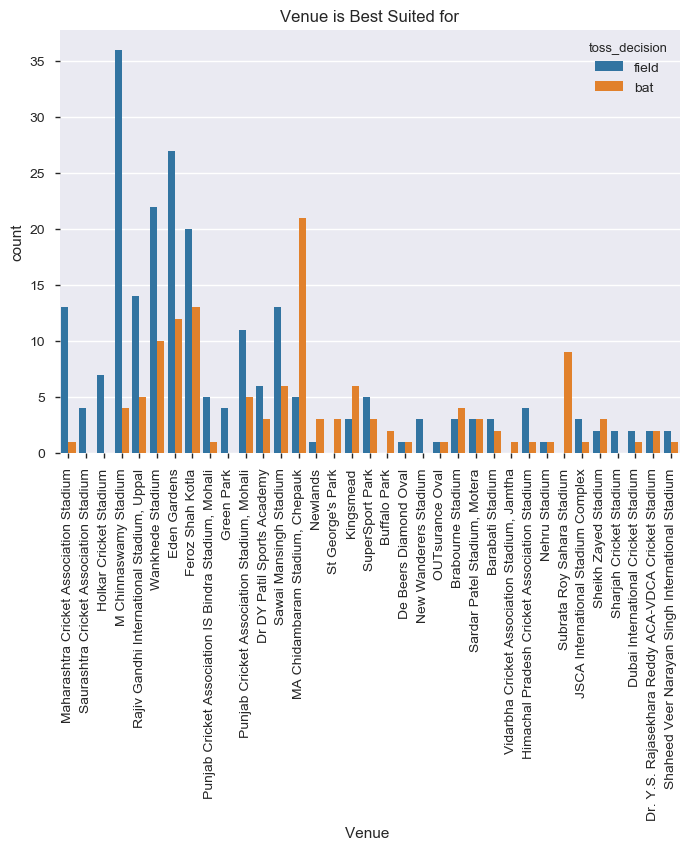

In [91]:
venue_suit_for =matches_data[matches_data['toss_winner'] == matches_data['winner']]
sns.countplot(x='venue',hue='toss_decision',data=venue_suit_for)
plt.xlabel('Venue ')
plt.title('Venue is Best Suited for')
plt.xticks(rotation=90)

__M Chinnaswamy stadium and Eden Gardens__ is best Suited for Feilding and __MA Chidambaram Stadium ,Chepauk__ is best suited for Batting.

### 4.26 Match Results : Normal , tie and no result <a class="anchor" id="section426">

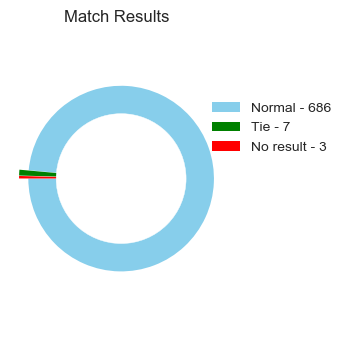

In [92]:

result=matches_data['result'].value_counts().tolist()
names='Normal - '+str(result[0]), 'Tie - '+str(result[1]), 'No result - '+str(result[2]), 

fig, ax = plt.subplots(figsize=(3.5,3.5))  
# Create a pieplot
explode = (0, 0.01, 0.01)
ax1,text=ax.pie(result,labeldistance=2,explode=explode,radius=0.1, startangle=180,colors=['skyblue','green','red'])
#plt.show()
ax.axis('equal')
ax.set_title("Match Results") 

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.07, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(ax1, names,  bbox_to_anchor=(.9,.8), loc=2)
plt.tight_layout()
plt.show()

### 4.27 Cities with maximum DL Applied <a class="anchor" id="section427">

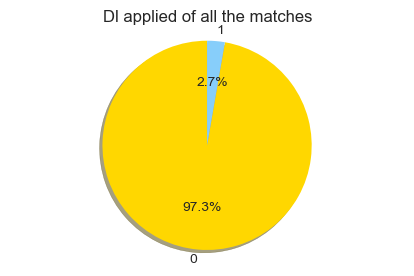

In [93]:
toss=matches_data['dl_applied'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']

# Plot
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Dl applied of all the matches')
plt.axis('equal')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

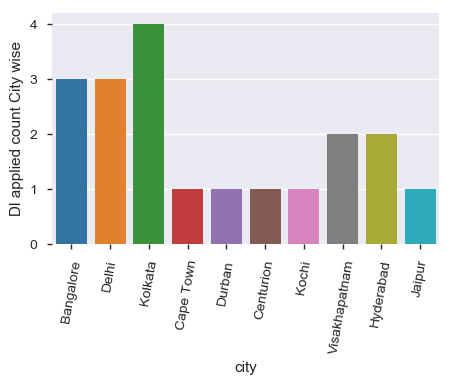

In [94]:
plt.figure(figsize=(5,3))
ax=sns.countplot(matches_data.city[matches_data.dl_applied==1])
plt.ylabel('Dl applied count City wise')
plt.xticks(rotation=80)


__Kolkata, Bangalore and Delhi__ is more likely to have bad weather.

### 4.28 Hypothesis: Mumbai Indians and Chennai Super Kings likely to win more matches
<a class="anchor" id="section428">

On studying Questionnaire 4.5, 4.6 and 4.8 we observed that Mumbai Indians and Chenni Super Kings are the teams who are more likely to win th IPL Season.

<a id=section5></a>

### 5. Conclusion 


- This dataset contains data about IPL matches  from season 2008 to 2018
- Totally 13 teams has participated in IPL History and few teams like Pune Warriors,Kochi Tuskers Kerala,Rising Pune Supergiants, Gujarat Lions has been only in 2 seasons but the success rate of __Rising Pune Supergiants__ is good comparatively among the new teams (__From: Section 4.6__)
- __Mumbai Indians, Royal Challangers Bangalore and Chennai Super kings__ are best Defending teams (__From: Section 4.11__) 
- __Royal Challangers Bangalore, Mumbai Indians__ and __Kolkata Knight Riders__ are the best Chasing teams (__From: Section 4.14__)
- From the year 2014 most of the teams are opting to field after winning toss and are also successful in winning the match. (__From: Section 4.18 and 4.19__)
- Overall  __Chennai Super Kings__ and __Mumbai Indians__ have high success rate and these two teams are the most successful teams in the tournament with 3 season wins each (__From: Section 4.5 ,4.6 and 4.8__)
- From the analysis, it was concluded that __Chennai Super Kings__ and __Mumbai Indians__  are more likely to win upcoming IPL seasons (__Collectively From: 4.5, 4.6, 4.8__ )
